#### Data Science and Business Analytics Internship (The Sparks Foundation)

#### Author: Faiza Rahman
#### Batch: June 2021

#### Title: Prediction using Unsupervised Learning

#### Introduction

Unsupervised Machine Learning

Unsupervised learning (UL) is a type of algorithm that learns patterns from untagged data. The hope is that, through mimicry, the machine is forced to build a compact internal representation of its world and then generate imaginative content. In contrast to supervised learning (SL) where data is tagged by a human, e.g. as "car" or "fish" etc, UL exhibits self-organization that captures patterns as neuronal predilections or probability densities.

Some of the most common algorithms used in unsupervised learning include:
(1) Clustering
(2) Anomaly detection
(3) Neural Networks
(4) Approaches for learning latent variable models.

Each approach uses several methods as follows:

Clustering methods include: hierarchical clustering, k-means, mixture models, DBSCAN, and OPTICS algorithm.

Anomaly detection methods include: Local Outlier Factor, and Isolation Forest.

Approaches for learning latent variable models such as Expectation–maximization algorithm (EM), Method of moments, and Blind signal separation techniques (Principal component analysis, Independent component analysis, Non-negative matrix factorization, Singular value decomposition )

Cluster Analysis

Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data analysis, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning.

Cluster analysis itself is not one specific algorithm, but the general task to be solved. It can be achieved by various algorithms that differ significantly in their understanding of what constitutes a cluster and how to efficiently find them. Popular notions of clusters include groups with small distances between cluster members, dense areas of the data space, intervals or particular statistical distributions. Clustering can therefore be formulated as a multi-objective optimization problem. The appropriate clustering algorithm and parameter settings (including parameters such as the distance function to use, a density threshold or the number of expected clusters) depend on the individual data set and intended use of the results. Cluster analysis as such is not an automatic task, but an iterative process of knowledge discovery or interactive multi-objective optimization that involves trial and failure. It is often necessary to modify data preprocessing and model parameters until the result achieves the desired properties.

#### Objective

Our main objective is to identify the optimum number of clusters using unsupervised machine learning and represent them visually.

#### Packages and Libraries

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import os
import seaborn as sns

C:\Users\Hp\Anaconda3\anaconda new\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


In [4]:
#Changing the working directory.
os.chdir('C:/Users/Hp/Desktop/GRIPJUNE21')

#### Data Description

The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). 

In [5]:
#Loading the iris dataset into the jupyter notebook.
iris=pd.read_csv('iris.csv')
print('Data imported successfully')

Data imported successfully


In [6]:
#First few records of the imported iris dataset.
print('--First few records of the imported iris dataset--')
iris.head(10)

--First few records of the imported iris dataset--


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


#### Analysis

In [7]:
#Checking the type of the object iris.
print(type(iris))
print('Thus, iris is a dataframe.')

<class 'pandas.core.frame.DataFrame'>
Thus, iris is a dataframe.


In [8]:
#Obtaining the information regarding iris dataset.
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
#Checking if there exists any null values in the dataset.
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Thus, it is observed that the dataset is free of null values. Hence we proceed with further analysis.

In [10]:
#Obtaining the size of the dataset.
iris.shape

(150, 5)

Thus, the iris dataset consists of 150 records and 5 columns.

In [11]:
#Obtaining the summary of the dataset.
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
#Printing the variable names of the dataset.
print(iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [13]:
#Obtaining the total count of flowers under each species type.
iris['species'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

It is observed that there are total 50 flowers under each species type.

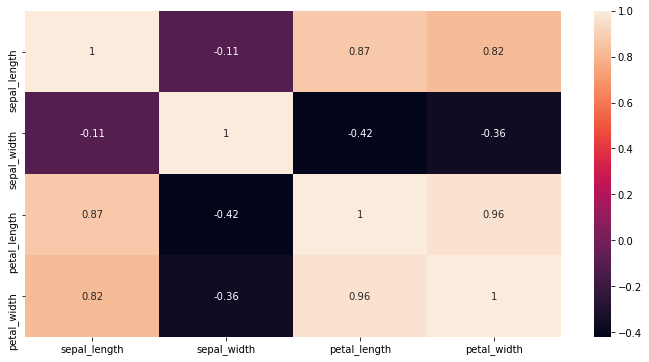

In [14]:
#Obtaining the correlation coefficient between variables using heatmap.
correlation = iris.corr()
plt.figure(figsize = (12,6))
sns.heatmap(correlation, xticklabels= correlation.columns,yticklabels=correlation. columns, annot=True)
plt.show()

It is observed that petal length is highly positively correlated with petal width and sepal length.

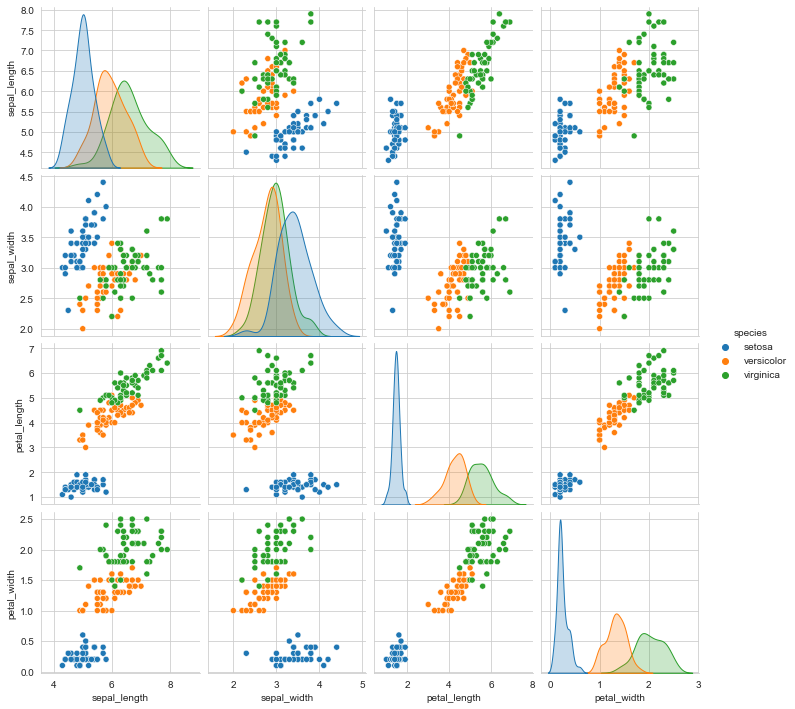

In [16]:
#Obtaining the pair plot.
sns.set_style("whitegrid");
sns.pairplot(iris,hue="species");
plt.show()

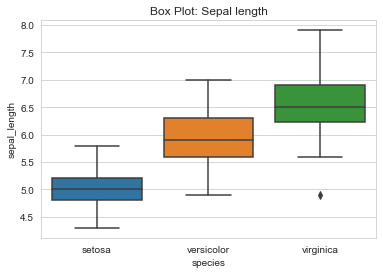

In [17]:
#Boxplot of sepal length data for each species.
sns.boxplot(x="species",y="sepal_length", data=iris)
plt.title("Box Plot: Sepal length")
plt.show()

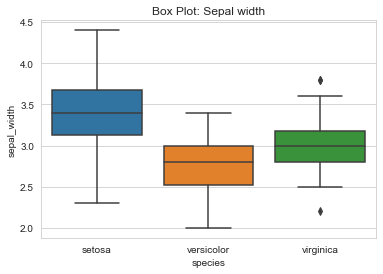

In [18]:
#Boxplot of sepal width data for each species.
sns.boxplot(x="species",y="sepal_width", data=iris)
plt.title("Box Plot: Sepal width")
plt.show()

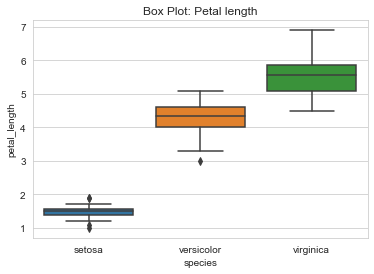

In [19]:
#Boxplot of petal length data for each species.
sns.boxplot(x="species",y="petal_length", data=iris)
plt.title("Box Plot: Petal length")
plt.show()

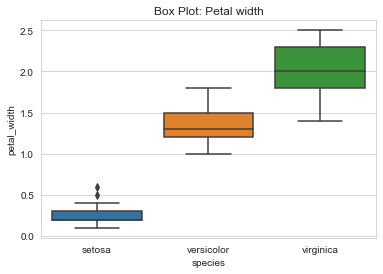

In [20]:
#Boxplot of petal width data for each species.
sns.boxplot(x="species",y="petal_width", data=iris)
plt.title("Box Plot: Petal width")
plt.show()

Elbow Method: It is an empirical method to find out the best value of k. it picks up the range of values and takes the best among them. It calculates the sum of the square of the points and calculates the average distance. When the value of k is 1, the within-cluster sum of the square will be high.

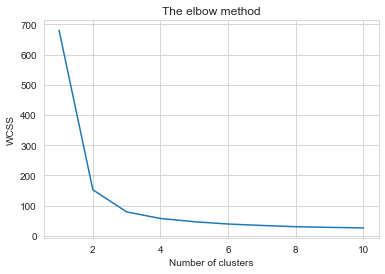

In [19]:
# Finding the optimum number of clusters for k-means classification

x = iris.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

Thus, the optimum number of cluster is 3 since the curve decreases abruptly at k = 3. k denotes the number of cluster.

In [20]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

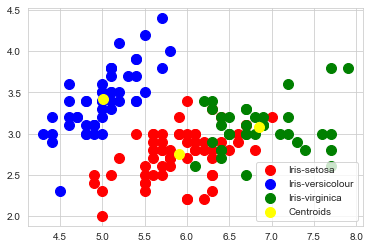

In [21]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

Above is the visual representation of k means cluster of iris dataset.

THANK YOU..